# Algoritmo para estimativa de fase quântica

Esse algoritmo serve para estimarmos os autovalores de um operador unitário, que são os operadores que fazem a dinâmica em mecânica quântica. Um operador é unitário se
$$U^{-1}=U^\dagger,$$
i.e.,
$$UU^\dagger = U^\dagger U=I.$$
Lembre que a adjunta $U^\dagger$ é a transposta conjugada $(U^T)^*=(U^*)^T.$

Vamos considerar a equação de autovalores e autovetores de um operador uniário:
$$U|u\rangle = u|u\rangle.$$
Tomando o produto interno desta equação com ela mesma, teremos que
\begin{align}
& \langle u|U^\dagger U|u\rangle = \langle u|u^* u|u\rangle \\
& \therefore\ \langle u|I|u\rangle = |u|^2\langle u|u\rangle \\
& \therefore\ 1 = |u|^2 \therefore\ 1 = |u|.
\end{align}
Ou seja, os autovalores de um operador unitário tem módulo igual a um. Escrevendo os números complexos na forma polar, teremos então que
$$u = |u|e^{i\phi} = e^{i\phi} =: e^{2\pi i\phi_u}.$$
Ou seja
$$\phi = 2\pi\phi_u\ \therefore\ \phi_u = \frac{\phi}{2\pi}\in[0,1]\ \text{se}\ \phi\in[0,2\pi].$$

No algoritmo de estimativa de fase quântico (AEFQ), que é uma das subrotinas mais importantes da computação quântica, assume-se a existência de uma __caixa preta__ capaz de preparar o autovetor
$$|u\rangle$$
e de implementar a porta controlada
$$C_{U^{2^j}}$$
para $j$ inteiro positivo. Claro, assume-se que isso seja feito de forma eficiente. Vale observar que $U^{2^j}$ de fato denota a unitária $U$ aplicada $2^j$ vezes.

O __problema__ que queremos resolver aqui é estimar a autofase desconhecida $$\phi_u=?$$

O AEFQ usa 2 registros. Um deles contém o número $n$ de qubits suficiente para codificar o estado $|u\rangle$. O outro registro contém $t$ qubits, todos preparados inicialmente no estado $|0\rangle$. Este número $t$ estará relacionado com a _precisão_ que teremos na estimativa de $\phi_u$.

Com isso, o estado inicial será
$$|\Psi_0\rangle = |0\rangle^{\otimes t}\otimes|u\rangle.$$

Na sequência, aplicamos uma porta Hadamard em cada um dos qubits do 1º registro, obtendo assim
\begin{align}
|\Psi_1\rangle & = (H^{\otimes t}\otimes I)(|0\rangle^{\otimes t}\otimes|u\rangle) \\
& = |+\rangle^{\otimes t}\otimes|u\rangle \\
& = 2^{-t/2}\big(|0\rangle_1+|1\rangle_1\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes|u\rangle.
\end{align}

O circuito quântico que implementa o AEFQ está mostrado abaixo. Já adianto que a ideia do algoritmo é preparar um estado quântico similar ao estado de Fourier.

![](https://drive.google.com/uc?export=view&id=1vr4PGVvk3vERNHoAgVPvexQP-HoAhgPZ)

![](https://drive.google.com/uc?export=view&id=1vogUAl5R06tytiWgVb0_M4hC-3NGa-MN)




Seguindo, aplica-se portas $U^{2^j}$ controladas, com o 2º registro (2ºr) como target e com o qubit
$$s=1,2,\cdots,t$$
como controle, de forma que
$$j=t-s.$$
Por exemplo, para o qubit $s=1$ como controle, teremos
\begin{align}
|\Psi_2\rangle & = C_{U^{2^{t-1}}}^{1\rightarrow (2ºr)}|\Psi_1\rangle \\
& = 2^{-t/2}\big(|0\rangle_1\otimes I|u\rangle+|1\rangle_1\otimes U^{2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1\otimes |u\rangle+|1\rangle_1\otimes e^{2\pi i\phi_u 2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes |u\rangle.
\end{align}
Note que acima notamos que usando a representação espectral do operador unitário
$$U=\sum_u u|u\rangle\langle u|,$$
temos que
$$U^{2^j}=\sum_u u^{2^j}|u\rangle\langle u|.$$
Então, para
$$u=e^{2\pi i\phi_u}$$
sendo autovalor de $U$, o autovalor correspondente de $U^{2^j}$ será
$$u^{2^j}=e^{2\pi i\phi_u 2^j}.$$

Note que similarmente ao ocorrido nos algoritmos de Deutsch-Jozsa, de Bernstein-Vazirani e de Simon, no AEFQ usamos uma transformação controlada tal que uma fase é adicionada ao estado do sistema sem mudar o estado do sistema auxiliar (o chamado phase kickback). Nos algoritmos anteriores essa fase dependia do valor da função enquanto que no AEFQ essa fase depende da fase $\phi_u$ que queremos estimar.

Do mesmo modo, continuando com a aplicação das portas $U^{2^{t-s}}$ controladas para o qubit $s=2,\cdots,t$ como controle, obteremos o estado
\begin{align}
|\Psi_3\rangle & = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{t-t}\phi_u}|1\rangle_{t}\big)\otimes |u\rangle \\
& = |\psi_3\rangle\otimes|u\rangle.
\end{align}

Vimos que a transformada de Fourier tem a seguinte ação em estados da base computacional:
$$ F|j\rangle = 2^{-t/2}\big(|0\rangle+e^{2\pi ij2^{-1}}|1\rangle\big)\otimes\big(|0\rangle+e^{2\pi ij2^{-2}}|1\rangle\big)\otimes\cdots \otimes\big(|0\rangle+e^{2\pi ij2^{-t}}|1\rangle\big).$$

__Se $2^t \phi_u$ fosse um número inteiro__, i.e., se
$$\phi_u\in\mathbb{Z},$$
poderíamos identificar
$$j=2^t \phi_u.$$
Com isso, teríamos que
\begin{align}
F|2^t \phi_u\rangle & = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^t \phi_u 2^{-1}}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^t \phi_u 2^{-2}}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^t\phi_u 2^{-t}}|1\rangle_{t}\big) \\
& = |\psi_3\rangle.
\end{align}

Com essa suposição, de que $2^t \phi_u \in \mathbb{Z}$, aplicando a transformada de Fourier inversa no 1º registro, obtemos o seguinte __estado final__:
\begin{align}
|\psi_4\rangle & = F^\dagger|\psi_3\rangle \\
& = F^\dagger F|2^t \phi_u\rangle \\
& = |2^t \phi_u\rangle.
\end{align}

Então, a penúltima fase do AEFQ é aplicar a transformada de Fourier inversa, $F^\dagger$, aos $t$ qubits do 1º registro. Feito isso, obteremos o estado $|2^t \phi_u\rangle$ medindo na base computacional, que é a última etapa do algoritmo.

Por fim, mesmo no caso em que __$2^t\phi_u$ não é um número inteiro__,
$$2^t \phi_u \notin\mathbb{Z},$$
executamos o mesmo circuito quântico. No final, fazemos uma medida na base computacional no 1º registro, obtendo e.g. um certo estado da base computacional:
$$|b\rangle = |b_1 b_2 \cdots b_t\rangle,$$
com
$$b_s = 0,1$$
para $s=0,\cdots,t.$ Com isso, a __fase é estimada__ usando-se
$$|2^{t}\phi_u\rangle \approx |b\rangle\ \therefore\ \phi_u \approx 2^{-t}b.$$

## Implementação

Para a implementação geral que faremos a seguir, notemos que
\begin{align}
(C_U)^2 & = C_U C_U \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big) \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^2\big) \\
& = C_{U^2}.
\end{align}
Com isso, teremos que
$$C_{U^N} = \Pi_{k=1}^{N} C_{U} = (C_U)^N.$$

O código para o AEFQ está implementado a seguir.

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2812d97db32027e73449419d8273a19cc0672e67e576d6023c02b36cd9fa3b70
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
# circuito quântico para a inversa da transformada de Fourier quântica
def qc_iqft(n):
    qc = QuantumCircuit(n, name='IQFT')
    if n%2 == 0:
        ul = n//2
    else:
        ul = (n-1)//2
    for p in range(ul-1, -1, -1):
        qc.swap(p, n-1-p)
    for l in range(n-1, -1, -1):
        if l < n-1:
            for q in range(n-1, l+1-1, -1):
                lb = -2*np.pi*2**(-q+l-1)
                qc.cp(lb, q, l)
        qc.h(l)
    return qc

In [ ]:
# circuito para preparar o autovetor |u> de U (caixa preta)
def qc_eigvec_prep(n):
    qc = QuantumCircuit(n, name=r'$|u\rangle$')
    qc.x(0) # prepara |1>
    return qc

In [ ]:
# circuito para a unitária (caixa preta)
def qc_U(n):
    qc = QuantumCircuit(n, name=r'$U$')
    qc.p(math.pi/4,0) # porta T, para phi_u = 1/8
    return qc

In [ ]:
# circuito para aplicar a unitária controlada N vezes
def qc_ctrlu(n,N):
    qc = QuantumCircuit(1+n, name=r'$C_U$'+str(N))
    qcU = qc_U(n)
    for k in range(0,N):
      # transforma circuito pra porta lógica e aplica de forma controlada
      qc.append(qcU.to_gate().control(1), list(range(0,n+1)))
    return qc

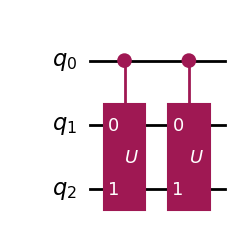

In [ ]:
n=2; N = 2; qccu = qc_ctrlu(n,N); qccu.draw('mpl')

In [ ]:
# circuito para o algoritmo de etimativa de fase quântica
def qc_qpe(t,n):
    # t = No. qubits do 1º registro; n = No. qubits do 2º registro (U atua no 2º registro)
    qc = QuantumCircuit(t+n, t, name='QPE')
    qc.h(list(range(0,t))) # aplica Hadamard no qubits do 1º registro
    qcup = qc_eigvec_prep(n) # prepara o 2º registro no autovetor |u> de U
    qc.append(qcup, list(range(t,t+n)))
    for j in range(t-1,-1,-1):
        N = 2**(t-1-j) # potência da U controlada
        qcctrlu = qc_ctrlu(n,N)
        lista = []
        lista.append(j)
        for l in range(t,t+n):
            lista.append(l)
        qc.append(qcctrlu, lista)
    qciqft = qc_iqft(t)
    qc.append(qciqft, list(range(0,t)))
    qc.measure(list(range(t)),list(range(t)))
    return qc

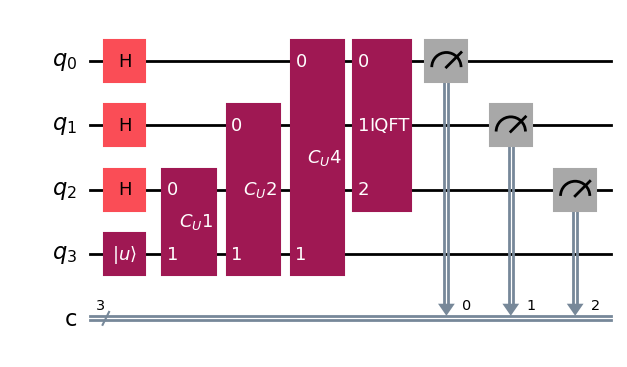

In [ ]:
qcqpe = qc_qpe(3,1)
qcqpe.draw('mpl')

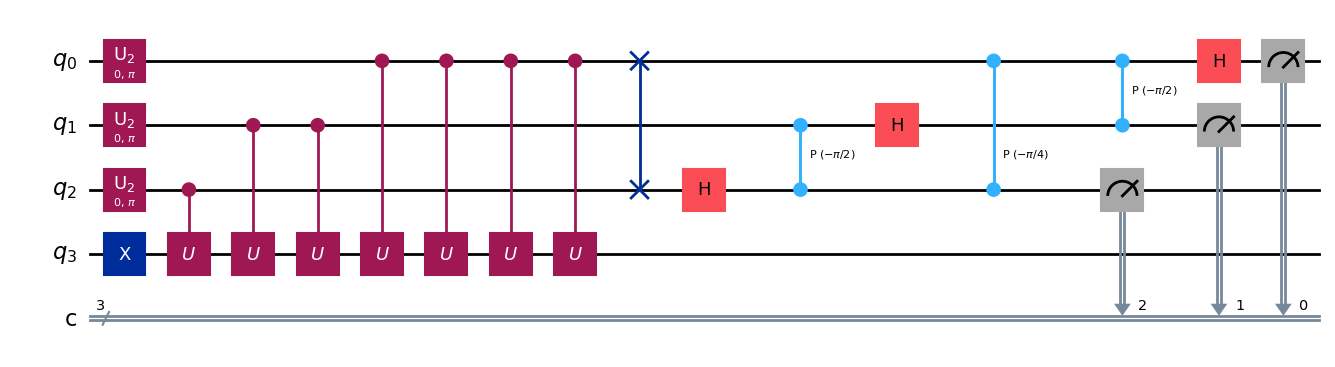

In [ ]:
qcqpe.decompose().draw('mpl')

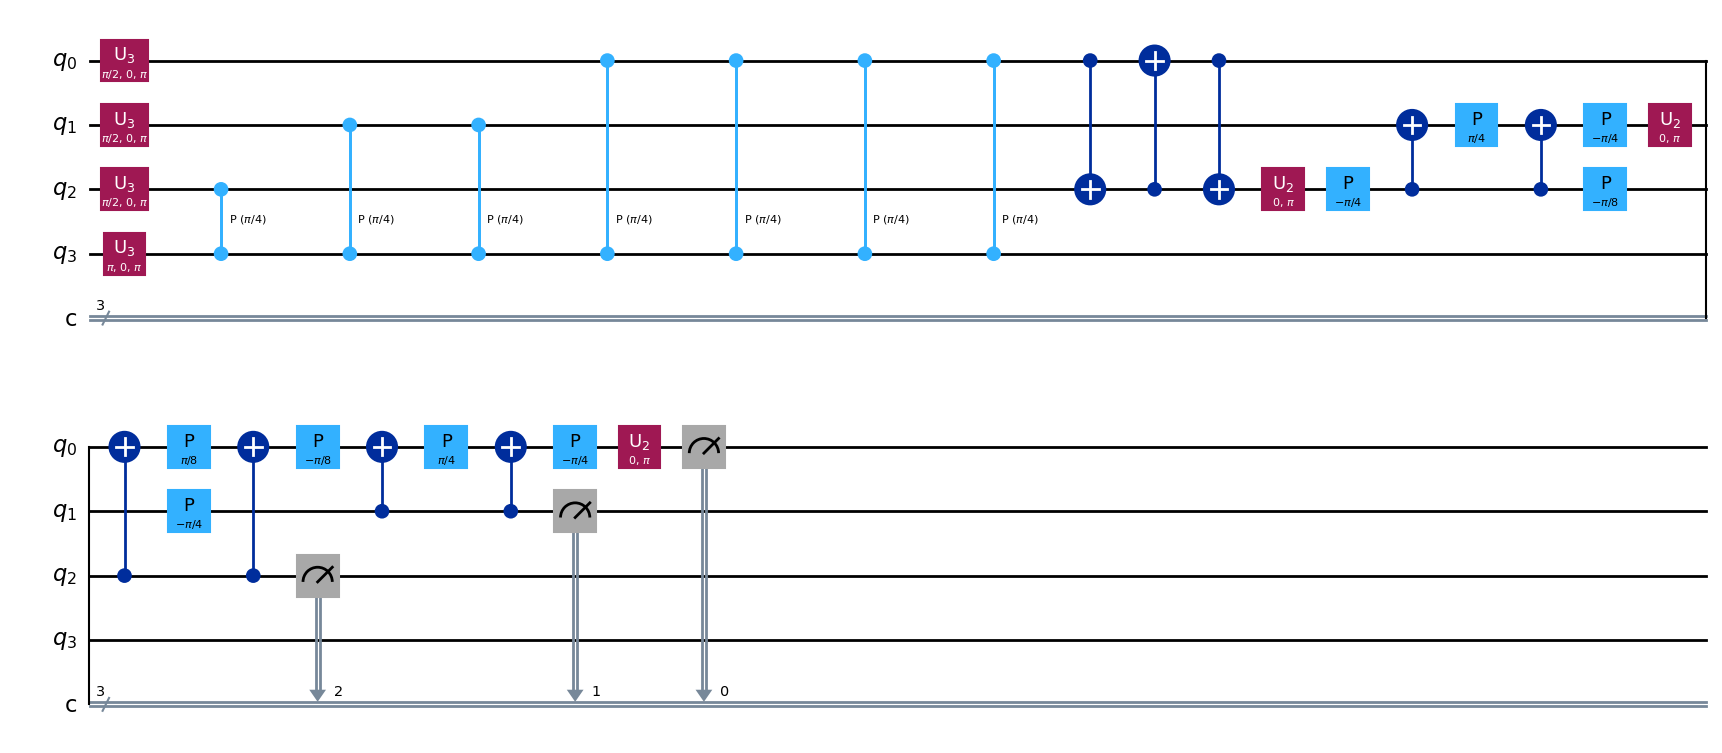

In [ ]:
qcqpe.decompose().decompose().draw('mpl')

## Exemplo: Porta $T$

Essa porta é
$$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4}\end{bmatrix} \equiv P(\phi=\pi/4).$$
Teremos assim que (lembra que $U|u\rangle = e^{2\pi i\phi_u}|u\rangle$)
$$T|1\rangle = e^{i\pi/4}|1\rangle = e^{2\pi i/8}|1\rangle = e^{2\pi i\phi_1}|1\rangle.$$
Ou seja (lembra que $\phi_u \approx 2^{-t}b$)
$$\phi_1 = \frac{1}{8} = 2^{-3} = 2^{-3}(1) = 2^{-3}(2^0) \equiv 2^{-3}(001)_{10},$$
em que usaremos
$$t=3$$
qubits para estimar $\phi_u$. Como nesse caso $2^3\phi_u=2^3 2^{-3}=1$ é inteiro, a estimativa é exata.

In [ ]:
# circuito para preparar o autovetor |u> de U (caixa preta)
def qc_eigvec_prep(n):
    qc = QuantumCircuit(n, name=r'$|u\rangle$')
    qc.x(0) # prepara |1>
    return qc

In [ ]:
# circuito para a unitária (caixa preta)
def qc_U(n):
    qc = QuantumCircuit(n, name=r'$U$')
    qc.p(math.pi/4,0) # porta T, para phi_u = 1/8
    return qc

### Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [ ]:
qc_list = []
qcqpe = qc_qpe(3,1)
qc_list.append(qcqpe.decompose().decompose())

In [ ]:
nshots = 2**12 # = 4096
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts = job.result()[0].data.c.get_counts()
counts

{'100': 4096}

Neste caso a autofase estimada é
\begin{align}
\phi_u & \approx 2^{-3}b \\
& = 2^{-3}(001) = 2^{-3}(1) \\
& = 1/8.
\end{align}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="e36b57b21fa9a4da07cbe4a0825fb25f0f82eafac35abd8b5087a914f290f317f10ffa1827d3d7c4497fde339da1c14fc0ef66b67b2cabdf028a30aea47191fa")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list, shots=nshots)
print(job.job_id())

csfhq8xjm3kg008qz7e0


In [ ]:
job_id = "csfhq8xjm3kg008qz7e0"
job = service.job(job_id)

In [ ]:
counts = job.result()[0].data.c.get_counts()
print(counts)

{'001': 85, '100': 2448, '101': 774, '010': 131, '000': 260, '011': 104, '111': 169, '110': 125}


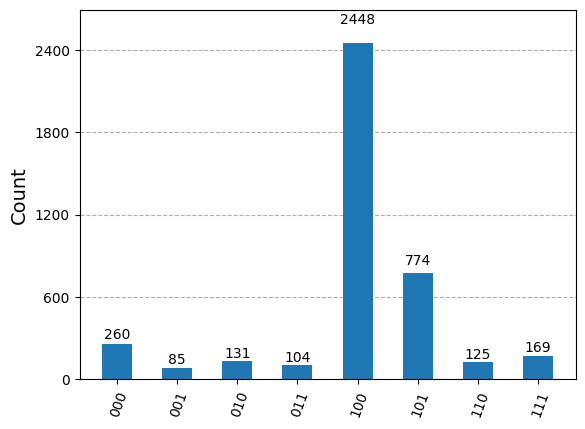

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Note que no experimento, por causa da decoerência (devida à interação com o meio ambiente) e dos erros de preparação, de portas e de medidas também obtemos outros estados da base computacional além de $|001\rangle$. Nesse tipo de situação, precisamos criar um __critério__ para escolher o estado da base computacional a ser usado na estimativa de fase. O critério mais natural, e que usaremos aqui, é a aplicação do estado que tem maior probabilidade (voto da maioria).

Para esse experimento, este estado é
$$|001\rangle,$$
e com isso obtemos o valor exato da fase
$$\phi_u = 1/8.$$

## Exemplo: $$\phi_u = 1/3 \approx 0.3333333$$

A porta $T$ que usamos no exemplo anterior é um caso particular da porta de fase
$$P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}.$$
Vamos usar essa mesma transformação unitária aqui. Para termos
$$\phi_u = 1/3,$$
o autovalor da unitária deve ser
$$u = e^{2\pi i\phi_u} = e^{i 2\pi/3}.$$
Portanto, neste caso a matriz unitária é
$$U = P(2\pi/3),$$
e teremos que
$$P(2\pi/3)|1\rangle = e^{i 2\pi/3}|1\rangle.$$

Para este exemplo, faremos somente simulações.

In [ ]:
# circuito quântico para a unitária (os outros circuitos não mudam)
def qc_U(n):
    qc = QuantumCircuit(n, name=r'$U$')
    qc.p(2*math.pi/3,0) # para phi_u = 1/3
    return qc

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

In [ ]:
qc_list = []
qcqpe = qc_qpe(3,1)
qc_list.append(qcqpe.decompose().decompose())

In [ ]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts = job.result()[0].data.c.get_counts()
print(counts)

{'110': 2855, '000': 66, '010': 681, '101': 77, '100': 122, '111': 48, '001': 189, '011': 58}


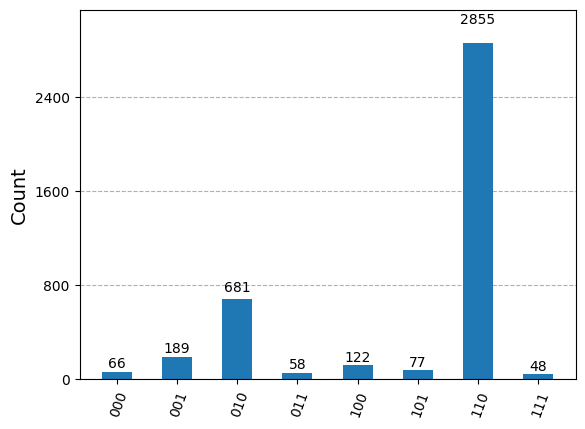

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

O estado com maior probabilidade é
$$|b\rangle = |011\rangle \equiv |0\times 2^2 + 1\times 2^1 + 1\times 2^0\rangle = |3\rangle.$$
Nossa estimativa para a fase é então
\begin{align}
\phi_u & \approx 2^{-t}b = 2^{-3}3 = 3/8 \\
& = 0.375.
\end{align}

In [ ]:
3/8

0.375

Como comentamos anteriormente, e vamos exemplificar aqui, para aumentar a precisão da nossa estimativa precisamos aumentar o número $t$ de qubits utilizados no 1º registro. Na sequência vamos fazer a simulação com
$$t=5.$$

In [ ]:
qc_list = []
t=5; n=1; qcqpe = qc_qpe(t,n)
qc_list.append(qcqpe.decompose().decompose())

In [ ]:
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts = job.result()[0].data.c.get_counts()
print(counts)

{'11010': 2761, '01010': 727, '10110': 63, '10101': 6, '00010': 41, '10010': 121, '00110': 175, '11110': 18, '00001': 17, '11100': 26, '01100': 18, '00000': 4, '10100': 12, '11001': 6, '01110': 28, '01000': 4, '11101': 1, '10001': 6, '10011': 2, '11000': 6, '01111': 4, '01001': 10, '01101': 5, '01011': 2, '10000': 5, '10111': 2, '11011': 3, '00011': 4, '00100': 13, '11111': 1, '00111': 1, '00101': 4}


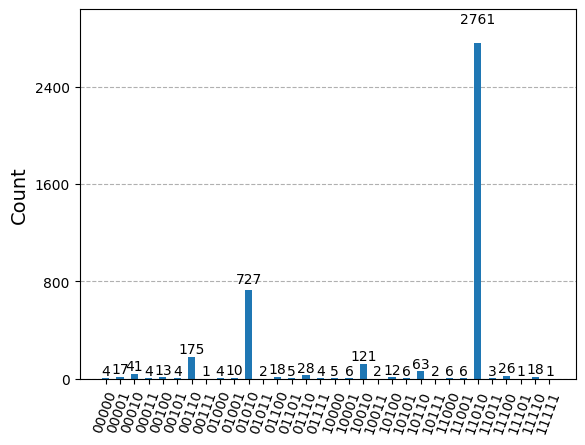

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

O estado mais provável é
$$|b\rangle = |01011\rangle \equiv |2^0 + 2^1 + 2^3\rangle = |11\rangle. $$
Nossa nova estimativa da fase é
\begin{align}
\phi_u & \approx 2^{-t}b = 2^{-5}\times 11 = 11/32 \\
& = 0.34375,
\end{align}
que está mais próxima do valor conhecido: $1/3 \approx 0.333333.$

In [ ]:
11/32

0.34375

### Ainda mais precisão
Para finalizar o exemplo, vamos usar ainda mais qubits no 1º registro para melhorar ainda mais a precisão.Vamos fazer
$$t= 10.$$

Nesse caso, fica complicado identificar o estado mais provável "no olho". Por isso, vamos fazer uma função para fazer isso automaticamente. Esta função está mostrada abaixo.

In [ ]:
def fun_b(counts, t):
    # funcao para calcular o inteiro base 10 correspondente ao bit string de máxima probabilidade
    list_keys = []; list_values = []
    for key, val in counts.items():
        list_keys.append(key)
        list_values.append(val)
    larger = 0
    for j in range(0, len(counts)):
        if list_values[j] > larger:
            larger = list_values[j]
            j_max = j
    # transforma a string correspondente à max probabilidade em uma lista e interiras 0 ou 1
    bl = [int(bit) for bit in list_keys[j_max]]
    b = 0
    for j in range(0,t):
        if bl[j] != 0:
            b = b + 2**j
    return b

In [ ]:
qc_list = []
t=10; n=1; qcqpe = qc_qpe(t,n)
qc_list.append(qcqpe.decompose().decompose())

In [ ]:
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts = job.result()[0].data.c.get_counts()
print(counts)

{'1010101010': 2764, '0110101010': 707, '1110101010': 114, '0010101010': 181, '1000101010': 11, '0001101010': 56, '1100101010': 58, '1101101010': 11, '0101101010': 14, '1100001010': 2, '1000011010': 3, '0000101010': 16, '0100101010': 26, '1001101010': 26, '0100011010': 1, '1111000010': 1, '1011110010': 1, '1010011010': 2, '0001001010': 1, '0011001010': 1, '0001111010': 1, '0111001010': 6, '1011101010': 5, '1000000110': 1, '1101011010': 3, '0011011010': 2, '1011011010': 1, '1000010010': 1, '0101011100': 1, '1011100010': 1, '0111101010': 4, '0011101010': 6, '0101001010': 2, '1011001010': 7, '0000001010': 2, '1111111100': 1, '0010000010': 1, '0011111010': 1, '1000001010': 1, '1011000110': 1, '1111101010': 5, '1111001010': 8, '0011001100': 1, '0000000110': 1, '0101110010': 3, '0011110010': 2, '0001010010': 1, '1010111110': 1, '0101011010': 1, '1010100110': 1, '1011100110': 2, '0110111010': 1, '0111010110': 1, '1010110010': 2, '0010000001': 1, '1101000110': 1, '0100111010': 1, '0001011010':

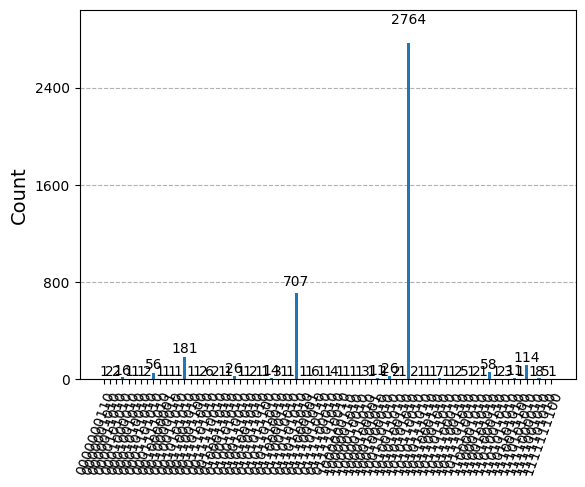

In [ ]:
plot_histogram(counts)

In [ ]:
t = 10
b = fun_b(counts,t)
print(b, b/2**t)

341 0.3330078125


Coforme o código acima, nesse caso a estimativa para a autofase é
$$\phi_u \approx \frac{341}{2^{10}} \approx 0.3330078125,$$
que já está bem próximo de $0.3333333333.$

## Exemplo: unitária de 2 qubits

Vamos considerar
$$U = C_z = \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&1&0 \\ 0&0&0&-1\end{bmatrix}.$$
Vamos considerar o autorvetor
$$|u\rangle = \begin{bmatrix}0\\0\\0\\1\end{bmatrix} = |11\rangle,$$
cujo autovalor correspondente é
$$u = -1 = e^{i\pi} = e^{2\pi i/2}.$$
Então, nesse caso teremos que
$$\phi_u = \frac{1}{2}.$$

In [ ]:
# Nova função para preparar o autovetor |11>
def qc_eigvec_prep(n):
    qc = QuantumCircuit(n, name=r'$|u\rangle$')
    qc.x([0,1])
    return qc

In [ ]:
# Nova função para a unitária C_z
def qc_U(n):
    qc = QuantumCircuit(n, name=r'$U$')
    qc.cz(0,1)
    return qc

In [ ]:
qc_list = []
qcqpe = qc_qpe(t=1,n=2)
qc_list.append(qcqpe.decompose().decompose())

In [ ]:
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts = job.result()[0].data.c.get_counts()
print(counts)

{'1': 4096}


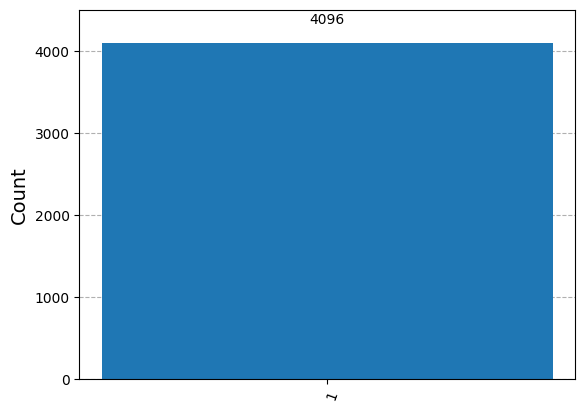

In [ ]:
plot_histogram(counts)

Temos assim a estimativa para a autofase:
\begin{align}
\phi_u & \approx 2^{-t}b = 2^{-1}(1) = 2^{-1}2^0 \\
& = 1/2.
\end{align}

# Análise de performance e requerimentos

Vimos que depois da aplicação das portas unitárias controladas, o estado dos $t$ qubits do 1º registro é dado por
$$|\psi_3\rangle = \frac{1}{2^{t/2}}\sum_{k=0}^{2^t -1}e^{2\pi i k\phi_u}|k\rangle.$$
Lembremos que a transformada de Fourier discreta quântica e sua inversa são
\begin{align}
& F = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{2\pi i kl 2^{-t}}|k\rangle\langle l|, \\
& F^\dagger = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k| \equiv \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|k\rangle\langle l|.
\end{align}

Com isso, o estado final do protocolo de estimativa de fase será
\begin{align}
|\psi_4\rangle & = F^\dagger|\psi_3\rangle \\
& = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k|\frac{1}{2^{t/2}}\sum_{j=0}^{2^t -1}e^{2\pi i j\phi_u}|j\rangle \\
& = \frac{1}{2^t}\sum_{k,l,j=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}e^{2\pi i j\phi_u}|l\rangle\langle k|j\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}+2\pi i k\phi_u}\Big)|l\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k\Big)|l\rangle \\
& =: \sum_{l=0}^{2^t - 1}\alpha_l|l\rangle,
\end{align}
em que definimos
$$\alpha_l = \frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k.$$

---

### Série geométrica
Na sequência faremos uso da seguinte série:
$$S_n = \sum_{j=0}^{n-1}ar^j = \sum_{l=1}^{n}ar^{l-1} = \frac{a(1-r^n)}{1-r}.$$

Essa série pode ser obtida como segue. Primeiramente vemos que a fórmula é valida para $n=1$:
$$S_1 = \sum_{j=0}^{1-1}ar^j = a$$
e
$$\frac{a(1-r^1)}{1-r} = a.$$
Agora vamos fazer a __prova por indução__. Assumimos que a fórmula é válida para $n=k$, ou seja, assumimos que
$$S_k = \sum_{j=0}^{k-1}ar^j  = \frac{a(1-r^k)}{1-r}.$$

Vamos mostrar que isso implica que a fórmula também é válida para $n=k+1$:
\begin{align}
S_{k+1} & = \sum_{j=0}^{k+1-1}ar^j = \sum_{j=0}^{k}ar^j = \sum_{j=0}^{k-1}ar^j + ar^{k} \\
& = S_k + ar^{k} = \frac{a(1-r^k)}{1-r} + ar^{k} \\
& = \frac{a\big(1-r^k +r^{k}(1-r)\big)}{1-r} \\
& = \frac{a\big(1-r^k + r^{k} - r^{k+1}\big)}{1-r} \\
& = \frac{a(1-r^{k+1})}{1-r}.
\end{align}
Concluímos assim, por indução, que se a fórmula vale para $n=k$ ela vale para $n=k+1$. Então, como a fórmula vale para $n=1$, ela valerá para todo $n>1$.

---

Usando a série geométrica, podemos escrever as __amplitudes de probabilidade__ no estado $|\psi_4\rangle$ como
\begin{align}
\alpha_l & = \frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k \\
& = \frac{1}{2^t}\frac{1-\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^{2^t}}{1-e^{2\pi i(\phi_u - l 2^{-t})}} \\
& = \frac{1}{2^t}\frac{1-e^{2\pi i(2^t \phi_u - l)}}{1-e^{2\pi i(\phi_u - l 2^{-t})}}.
\end{align}

Consideremos
$$b\in\mathbb{N},\ 0\le b\le 2^t - 1$$
de forma que
$$b = \lfloor 2^t\phi_u\rfloor$$
é o número __inteiro mais próximo__ de $2^t \phi_u$. A diferença é dada então por
$$2^t \delta = 2^t\phi_u - b \ge 0\ \therefore\ \delta = \phi_u - 2^{-t}b,$$
de forma que
$$0\le 2^t\delta\le 1\ \therefore\ 0\le\delta\le 2^{-t}.$$

![](https://drive.google.com/uc?export=view&id=173MaDmoZYSNDmFnVh4l6TJHwdwSJ5WFb)

Para
$$\epsilon\in\mathbb{Z}_{>0}$$
sendo um número inteiro estabelecendo o __erro tolerado__, a probabilidade de medirmos um estado $|m\rangle$ tal que $|m-b|>\epsilon$ é
$$Pr(|m-b|>\epsilon) = \sum_{l=0}^{b-(\epsilon+1)}|\alpha_l|^2 + \sum_{l=b+(\epsilon+1)}^{2^t -1}|\alpha_l|^2.$$
Veja a figura abaixo.

![](https://drive.google.com/uc?export=view&id=11xYQxL9g6IQhloIJsr6srKYHpK7tw0uE)

---
Temos que
\begin{align}
|1-e^{i\theta}| & = |-e^{i\theta/2}(-e^{-i\theta/2}+e^{i\theta/2})| \\
& = |-e^{i\theta/2}||2i\sin(\theta/2)| \\
& = 2|\sin(\theta/2)| \\
& \le 2,
\end{align}
em que usamos $|\sin(\theta/2)|\le 1$.

---

Usando essa desigualdade, obtemos
\begin{align}
|\alpha_l| & = \Big|\frac{1}{2^t}\frac{1-e^{2\pi i(2^t \phi_u - l)}}{1-e^{2\pi i(\phi_u - l 2^{-t})}}\Big| \\
& = \frac{1}{2^t}\frac{\Big|1-e^{2\pi i(2^t \phi_u - l)}\Big|}{\Big|1-e^{2\pi i(\phi_u - l 2^{-t})}\Big|} \\
& \le \frac{1}{2^t}\frac{2}{\Big|1-e^{2\pi i(\phi_u - l 2^{-t})}\Big|}.
\end{align}

---
Também é valida a desigualdade
$$|1-e^{i\theta}|\ge \frac{2|\theta|}{\pi}\ \text{para}\ -\pi\le\theta\le\pi.$$
Esta relação está verificada graficamente abaixo.

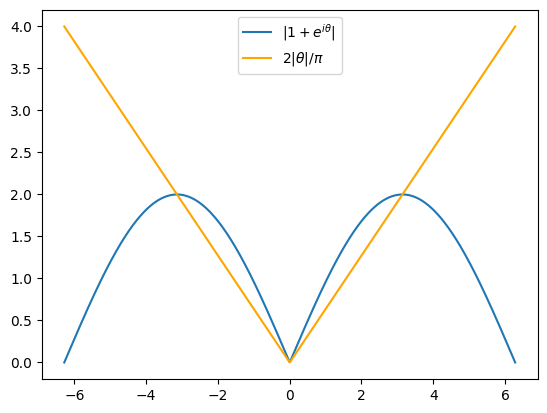

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y1 = np.abs(1-np.cos(x)+1j*np.sin(x))
y2 = (2*np.abs(x))/math.pi
plt.plot(x, y1, label=r'$|1+e^{i\theta}|$')
plt.plot(x, y2, label=r'$2|\theta|/\pi$', color='orange')
plt.legend()
plt.show()

Na equação acima teríamos
\begin{align}
\theta = 2\pi(\phi_u - 2^{-t}l) = \pi \frac{2^t \phi_u - l}{2^{t-1}}.
\end{align}
Esse $\theta$ está em $[-\pi,\pi]$?

Usando a desigualdade $|1-e^{i\theta}|\ge 2|\theta|/\pi$ para $-\pi\le\theta\le\pi$, teremos que
\begin{align}
|\alpha_l| & \le \frac{1}{2^{t-1}}\frac{1}{\Big|1-e^{i 2\pi (\phi_u - l 2^{-t})}\Big|} \\
& \le \frac{1}{2^{t-1}}\frac{1}{2|2\pi (\phi_u - l 2^{-t})|/\pi} \\
& = \frac{1}{2^{t+1}|\phi_u - l 2^{-t}|} \\
& = \frac{1}{2|2^t \phi_u - l|}.
\end{align}

Vem assim que
\begin{align}
Pr(|m-b|>\epsilon) & = \sum_{l=0}^{b-(\epsilon+1)}|\alpha_l|^2 + \sum_{l=b+(\epsilon+1)}^{2^t -1}|\alpha_l|^2 \\
& \le \sum_{l=0}^{b-(\epsilon+1)}\frac{1}{2^2|2^t \phi_u - l|^2} + \sum_{l=b+(\epsilon+1)}^{2^t -1}\frac{1}{2^2 |2^t \phi_u - l|^2} \\
& = \frac{1}{4}\sum_{l=0}^{b-\epsilon-1}\frac{1}{|2^t \phi_u - l|^2} + \frac{1}{4}\sum_{l=b+(\epsilon+1)}^{2^t -1}\frac{1}{|l-2^t \phi_u|^2} \\
& \vdots \\
& \le \frac{1}{2(\epsilon-1)}.
\end{align}

Segundo Nielsen e Chuang, para obter $\phi_u$ com $p$ _bits de precisão_ e com probabilidade de sucesso não menor que $p_s =1-\epsilon$ (_probabilidade de erro_ não maior que $\epsilon$) devemos utilizar o seguinte número de qubits no 1º registro:
$$t = p + \Big\lceil\log_2\Big(2+\frac{1}{2\epsilon}\Big)\Big\rceil.$$

Por exemplo, se queremos
$$p=5$$
bits de precisão e queremos que a probabilidade de sucesso seja
$$p_s=0.5\ \therefore\ \epsilon = 0.5,$$
então
$$t = 7.$$
Para
$$p_s=0.94\ \therefore\ \epsilon=2^{-4} = 0.0625$$
temos
$$t = 9.$$

In [ ]:
import math
math.log2(3), math.log2(10), 15/16, 2**(-4)

(1.584962500721156, 3.321928094887362, 0.9375, 0.0625)

## Complexidade computacional

No algoritmo de estimativa de fase quântica usamos
$$t$$
portas de Hadamard.

O autovetor $|u\rangle$ e a transformação unitária $U$ são implementados por uma caixa preta. Então não levaremos em conta a complexidade computacional dessas operações aqui. No entanto, teremos que fazer chamadas da caixa preta para implementar as portas $U^{2^j}$ controladas para $j=0,1,2,\cdots,t-1$. Como $C_{U^N}=\Pi_{j=1}^N C_U$, teremos que fazer
$$2^0+2^1+\cdots+ 2^{t-1} = \sum_{j=0}^{t-1}2^j = (1)\frac{1-2^t}{1-2} = 2^t -1,$$
em que usamos a série geométrica $\sum_{j=0}^{n-1}ar^j = a(1-r^n)/(1-r).$

Além disso, usamos a transformada de Fourier inversa, que tem uma complexidade computacional $\mathcal{O}(t^2).$

A complexidade computacional quântica do algoritmo de estimativa de fase é então
$$CC_Q = t + 2^t - 1 + t^2 = \mathcal{O}(2^t)+\mathcal{O}(t^2),$$
em que
$$t=p+\Big\lceil\log_2\Big(2+\frac{1}{2\epsilon}\Big)\Big\rceil$$
com $p$ sendo o número de bits de precisão e $\epsilon$ o erro tolerado.

Note que o custo da implementação feita acima é exponencial no número de qubits, que é proporcional à precisão requerida. No entanto, existem algoritmos muito mais eficientes para implementar as $U^{2^j}$ controladas. Na referência 6 está reportada uma implementação que usa
$$\mathcal{O}(t^3\log_2(t))$$
portas lógicas elementares para implementar esse algoritmo quântico, e mais algumas operações.

## Referências

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. John Preskill, Lecture Notes on Quantum Computation, http://theory.caltech.edu/~preskill/ph219/index.html#lecture.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.

1. S. Beauregard, “Circuit for Shor's algorithm using $2n+3$ qubits,” Feb. 21, 2003, arXiv: arXiv:quant-ph/0205095. doi: 10.48550/arXiv.quant-ph/0205095.
